In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose



In [251]:
# Read the content of CSV file and display firs few rows
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-09,14.771429,15.125000,14.656429,15.083929,13.095825,352584400
1,2013-07-10,14.985714,15.171429,14.937500,15.026071,13.045585,281405600
2,2013-07-11,15.105357,15.294643,15.041786,15.260357,13.248997,326292400
3,2013-07-12,15.273214,15.349643,15.121786,15.232500,13.224812,279563200
4,2013-07-15,15.178929,15.409286,15.171429,15.265714,13.253646,241917200


In [252]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600
2513,2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2514,2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2515,2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2516,2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000


In [253]:
# Get summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [254]:
# Get descriptive statistic for num column
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,69.794130,70.578870,69.059305,69.855044,68.000621,1.504588e+08
std,52.136610,52.795063,51.534308,52.200138,52.718144,9.729482e+07
min,14.771429,15.125000,14.656429,14.963929,12.991637,3.145820e+07
25%,28.290001,28.559999,28.002501,28.275000,25.899107,8.655360e+07
50%,43.900002,44.375000,43.634998,44.052502,42.083347,1.208104e+08
75%,123.870003,125.239998,122.250000,124.279999,122.346039,1.846588e+08
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.065523e+09


In the 10-year period, the minimum value of AAPL stock's adjusted close value was \\$13, while the maximum value reached \\$193. This indicates a significant range of price fluctuations for AAPL stock over that time frame.

In [255]:
first_date = df['Date'].head(1).values[0]
last_date = df['Date'].tail(1).values[0]

print("Starting Date of dataset:", first_date)
print("Ending Date of dataset:", last_date)

Starting Date of dataset: 2013-07-09
Ending Date of dataset: 2023-07-07


Apple stock data in the dataset covers the period from July 9, 2013, to July 7, 2023.

In [256]:
# Convert Date to a datetime column
df['Date'] = pd.to_datetime(df['Date'])
# Make Date the index 
df.set_index('Date', inplace=True)
df = df.asfreq('d')

In [257]:
df.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-09,14.771429,15.125000,14.656429,15.083929,13.095825,352584400.0
2013-07-10,14.985714,15.171429,14.937500,15.026071,13.045585,281405600.0
2013-07-11,15.105357,15.294643,15.041786,15.260357,13.248997,326292400.0
2013-07-12,15.273214,15.349643,15.121786,15.232500,13.224812,279563200.0
2013-07-13,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-14,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-15,15.178929,15.409286,15.171429,15.265714,13.253646,241917200.0


It's common for financial datasets to exclude weekends and holidays since stock markets are typically closed on those days. Therefore, missing values in the dataset for weekends and holidays are expected.<br> The dates July 13, 2013 (Saturday) and July 14, 2013 (Sunday) are not included in the dataset because they fall on a weekend. As a result, there are no recorded prices for those dates.
<br> It's important to note that when working with financial data, it's common practice to exclude weekends and holidays to maintain consistency in the dataset and align it with the trading days of the stock market or to fill it with appropriate method.

In [258]:
# Checking missing values
df.isna().sum()

Open         1134
High         1134
Low          1134
Close        1134
Adj Close    1134
Volume       1134
dtype: int64

Filling the missing values in a stock price time series with the mean is not recommended because the stock prices do not heavily fluctuate around the mean and exhibit a time variant pattern. It's important to use methods that can capture the characteristics of the stock price data as stock prices are influenced by various factors and exhibit dynamic behavior. So we will fill it with forward filling.

In [259]:
# Fill missing values using forward fill (ffill) method
df = df.fillna(method='ffill')
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

"Adj Close" (Adjusted Close) price is often used because it incorporates both the closing price of a security and adjustments for corporate actions such as dividends, stock splits, and other events that may affect the price.

In [260]:
# Create a new DataFrame containing only the 'Adj Close' column
df_close = pd.DataFrame(df['Adj Close'])                 
df_close.head()

,Adj Close
Date,
2013-07-09,13.095825
2013-07-10,13.045585
2013-07-11,13.248997
2013-07-12,13.224812
2013-07-13,13.224812


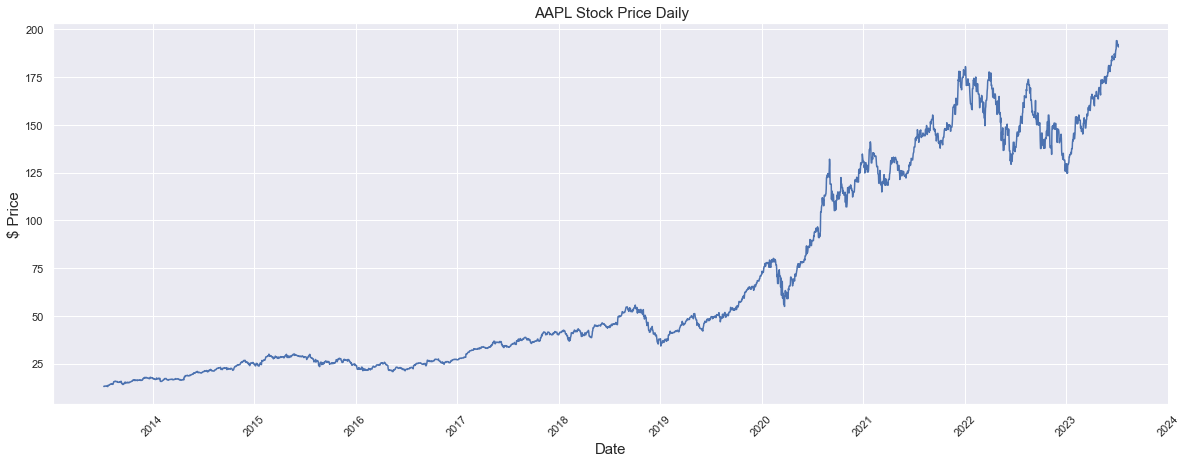

In [261]:
# Visualizing stock price trend
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x=df.index, y="Adj Close")
plt.xlabel('Date', fontsize=15)
plt.ylabel('$ Price', fontsize=15)
plt.title('AAPL Stock Price Daily', fontsize=15)
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


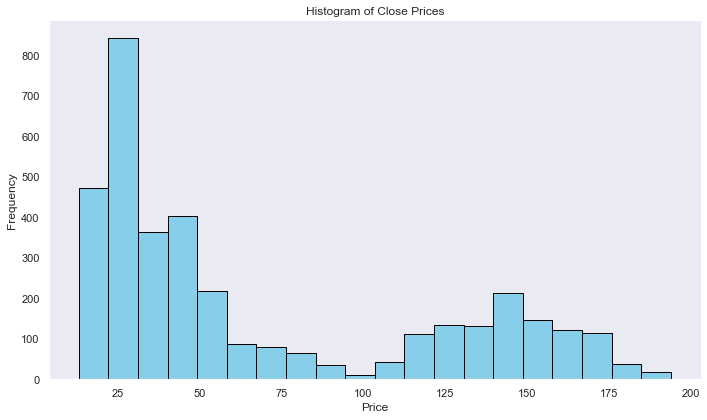

In [262]:
df_close.hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

In [263]:
# Create a copy of the 'df_close' DataFrame
df_close_copy = df_close.copy()
df_close_copy.head()

,Adj Close
Date,
2013-07-09,13.095825
2013-07-10,13.045585
2013-07-11,13.248997
2013-07-12,13.224812
2013-07-13,13.224812


In [264]:
# Calculate the percentage change in the "Adj Close" column and add it as a new column named "return" 
df_close_copy["return"] = df_close_copy["Adj Close"].pct_change()
df_close_copy.dropna(inplace = True)
df_close_copy.head()

,Adj Close,return
Date,,
2013-07-10,13.045585,-0.003836
2013-07-11,13.248997,0.015592
2013-07-12,13.224812,-0.001825
2013-07-13,13.224812,0.000000
2013-07-14,13.224812,0.000000


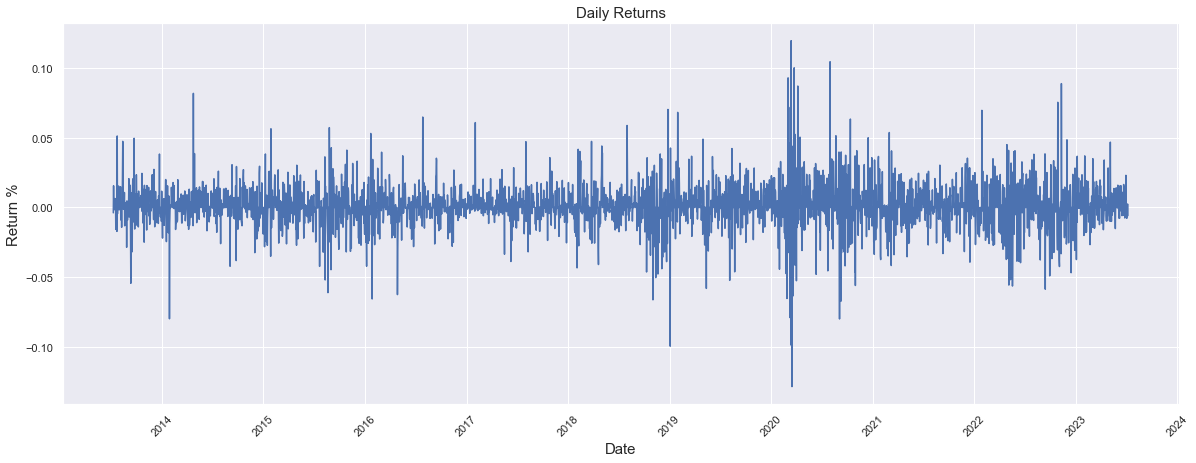

In [265]:
# Visualizing Daily Return
plt.figure(figsize=(20, 7))
sns.lineplot(data=df_close_copy, x=df_close_copy.index, y="return")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Return %', fontsize=15)
plt.title('Daily Returns', fontsize=15)
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [266]:
# Max return percentage date
df_close_copy['return'].idxmax()

Timestamp('2020-03-13 00:00:00')

In [267]:
# Max return percentage 
max_return_prct = df_close_copy['return'].max()
max_return_prct

0.11980841118357688

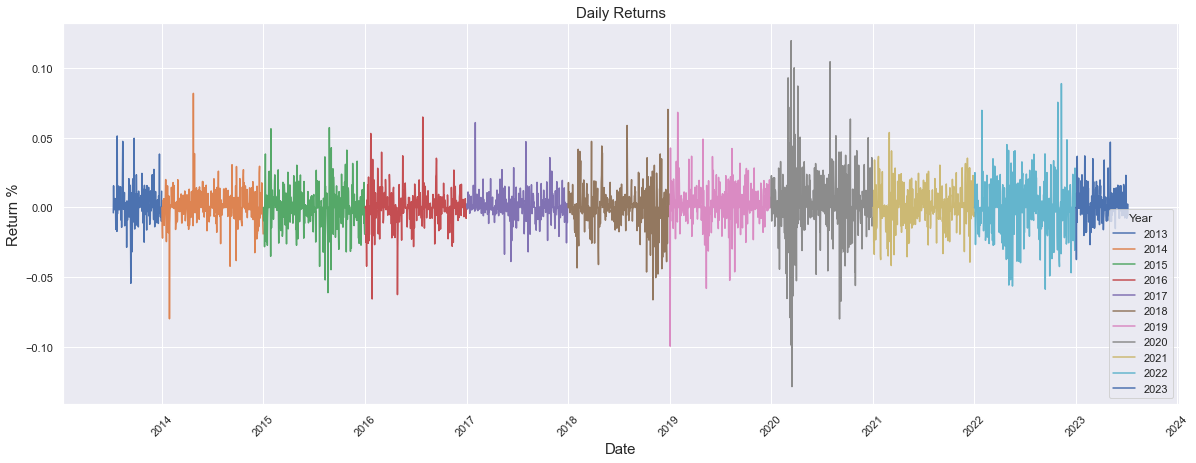

In [268]:
# Separating Years for visualization
df_close_copy['Year'] = df_close_copy.index.year
grouped_data = df_close_copy.groupby('Year')

plt.figure(figsize=(20, 7))

for year, data in grouped_data:
    sns.lineplot(data=data, x=data.index, y="return", label=year)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Return %', fontsize=15)
plt.title('Daily Returns', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Year', loc='lower right')
plt.grid(True)
plt.show()


When dealing with time series data, it is important to check for stationarity. Stationarity refers to the property of a time series where the statistical properties, such as the mean and variance, remain constant over time. let's check too see if further transformations or modeling techniques are needed to achieve stationarity.

### Testing for stationarity

In [269]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
df_ad = adfuller(df_close)

# Extract and display test results
output = pd.Series(df_ad[0:4], index=['Test Statistic -->', 'p-value -->', '#Lags Used', 'Number of Observations Used:'])
for key,value in df_ad[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Results of Dickey-Fuller Test: 

Test Statistic -->                 0.569771
p-value -->                        0.986846
#Lags Used                        25.000000
Number of Observations Used:    3625.000000
Critical Value (1%)               -3.432155
Critical Value (5%)               -2.862338
Critical Value (10%)              -2.567195
dtype: float64


In [270]:
result = adfuller(df_close)
p_value = result[1]
is_stationary = p_value < 0.05
print('P value is: ', p_value )
print('Is data stationary ? ',is_stationary)

P value is:  0.9868463569412729
Is data stationary ?  False


To achieve a stationary series, we must first estimate the underlying trend within the dataset. Subsequently, this estimated trend needs to be eliminated from the series. This can be accomplished by employing statistical modeling techniques. <br> To achieve stationarity in a time series, we can apply various techniques Differencing, Log Transformation, Moving Average or Exponential Smoothing.

## Transformation Process

Taking the logarithm of a time series can help stabilize the variance and reduce the impact of extreme values. It is often used when the data exhibits exponential growth or has a varying variance over time.

In [271]:
#use numpy log() function to get the log transform and plot
df_close_log = np.log(df_close)

In [272]:
df_close_log.head()

,Adj Close
Date,
2013-07-09,2.572293
2013-07-10,2.568450
2013-07-11,2.583922
2013-07-12,2.582095
2013-07-13,2.582095


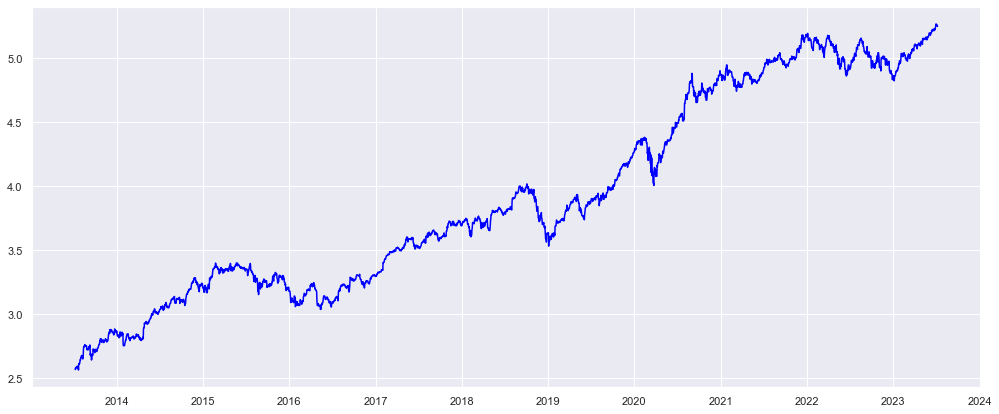

In [273]:
# Visualize lod transformed data 
fig = plt.figure(figsize=(17,7))
plt.plot(df_close_log, color='blue')

In [274]:
# check for stationarity 
result = adfuller(df_close_log)
p_value = result[1]
is_stationary = p_value < 0.05
print('P value is: ', p_value )
print('Is data stationary ? ',is_stationary)

P value is:  0.8902082752357698
Is data stationary ?  False


 The rolling mean, also known as the moving average, calculates the average value of a window of observations. By applying a rolling mean to the log-transformed series, we can estimate the underlying trend. The rolling mean smooths out short-term fluctuations and highlights the long-term trend in the data.

In [275]:
# Rolling mean using log transformed data
roll_mean = df_close_log.rolling(window=7).mean()

In [276]:
roll_mean.head(12)

,Adj Close
Date,
2013-07-09,NaN
2013-07-10,NaN
2013-07-11,NaN
2013-07-12,NaN
2013-07-13,NaN
2013-07-14,NaN
2013-07-15,2.579317
2013-07-16,2.581948
2013-07-17,2.585165


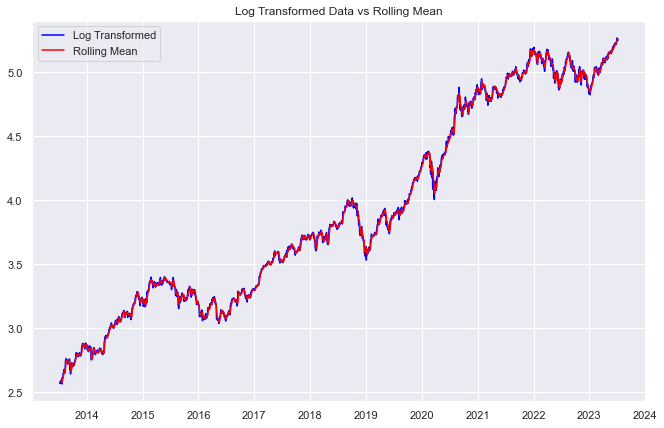

In [277]:
# Visualizing aaplied rolling mean to the log transformed data
fig = plt.figure(figsize=(11,7))
plt.plot(df_close_log, color='blue', label='Log Transformed')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data vs Rolling Mean')
plt.show(block=False)

Counting the rolling mean and subtracting it from a log-transformed time series can be a technique used to remove the trend component from the series. This step aims to eliminate the gradual changes or systematic patterns in the data, resulting in a detrended or stationary series.  This is particularly useful when the time series exhibits a clear trend that needs to be removed for further analysis or modeling.

In [278]:
# Subtracting moving average from the log transformed data
log_minus_roll_mean = df_close_log - roll_mean

log_minus_roll_mean.head(12)

,Adj Close
Date,
2013-07-09,NaN
2013-07-10,NaN
2013-07-11,NaN
2013-07-12,NaN
2013-07-13,NaN
2013-07-14,NaN
2013-07-15,0.004955
2013-07-16,0.008761
2013-07-17,0.005800


In [279]:
log_minus_roll_mean.dropna(inplace=True)
log_minus_roll_mean.head()

,Adj Close
Date,
2013-07-15,0.004955
2013-07-16,0.008761
2013-07-17,0.005800
2013-07-18,0.007677
2013-07-19,-0.007697


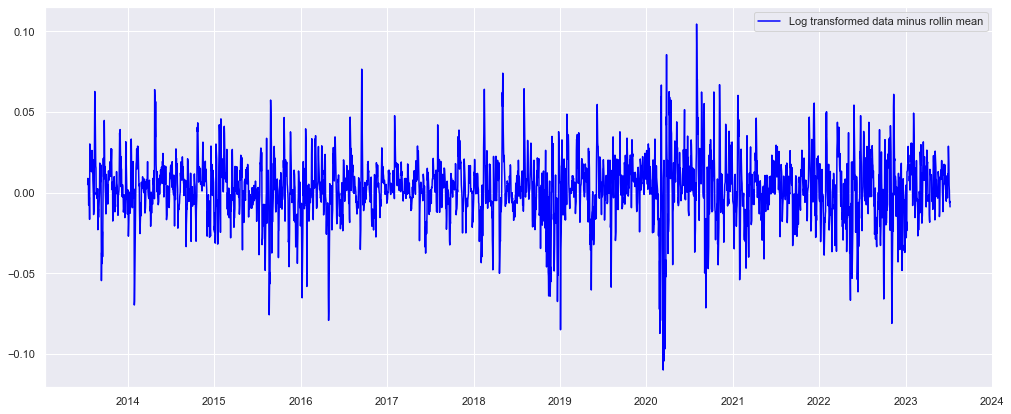

In [280]:
# Plotting log minus roll_mean data
fig = plt.figure(figsize=(17,7))
plt.plot(log_minus_roll_mean, color='blue',label='Log transformed data minus rollin mean')
plt.legend(loc='best')
plt.show(block=False)

In [281]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
df_ad = adfuller(log_minus_roll_mean)

# Extract and display test results
output = pd.Series(df_ad[0:4], index=['Test Statistic -->', 'p-value -->', '#Lags Used', 'Number of Observations Used:'])
for key,value in df_ad[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Results of Dickey-Fuller Test: 

Test Statistic -->             -1.150448e+01
p-value -->                     4.409877e-21
#Lags Used                      2.000000e+01
Number of Observations Used:    3.624000e+03
Critical Value (1%)            -3.432156e+00
Critical Value (5%)            -2.862338e+00
Critical Value (10%)           -2.567195e+00
dtype: float64


In [282]:
# check for stationarity 
result = adfuller(log_minus_roll_mean)
p_value = result[1]
is_stationary = p_value < 0.05
print('P value is: ', p_value )
print('Is data stationary ? ',is_stationary)

P value is:  4.409877109003299e-21
Is data stationary ?  True


## Splitting actual data and visualize

We split the series based on a specific time duration. We split the series by using a certain percentage of the data for training and the remaining percentage for testing. This approach ensures that the training and testing sets maintain the temporal order of the data. <br> Splitting the Data keeping chronoligal order of the values. We don't shuffle. Training set should include all the values from the beginning of the data up to a specific point in time. The rest will be a testing set. We have to decide how to split our training dataset if it is too large the model will fit the trainig set too well and will perform poorly. If it is too small we will not be able to create model accurate. Let's do 80-20.

In [283]:
len(df_close)

3651

In [284]:
size = int(len(df_close)*0.8)
size

2920

In [285]:
df_train_actual = df_close.iloc[:size]
df_train_actual

,Adj Close
Date,
2013-07-09,13.095825
2013-07-10,13.045585
2013-07-11,13.248997
2013-07-12,13.224812
2013-07-13,13.224812
...,...
2021-07-02,138.338882
2021-07-03,138.338882
2021-07-04,138.338882


In [286]:
df_test_actual = df_close.iloc[size:] 
df_test_actual

,Adj Close
Date,
2021-07-07,142.895462
2021-07-08,141.580887
2021-07-09,143.429214
2021-07-10,143.429214
2021-07-11,143.429214
...,...
2023-07-03,192.460007
2023-07-04,192.460007
2023-07-05,191.330002


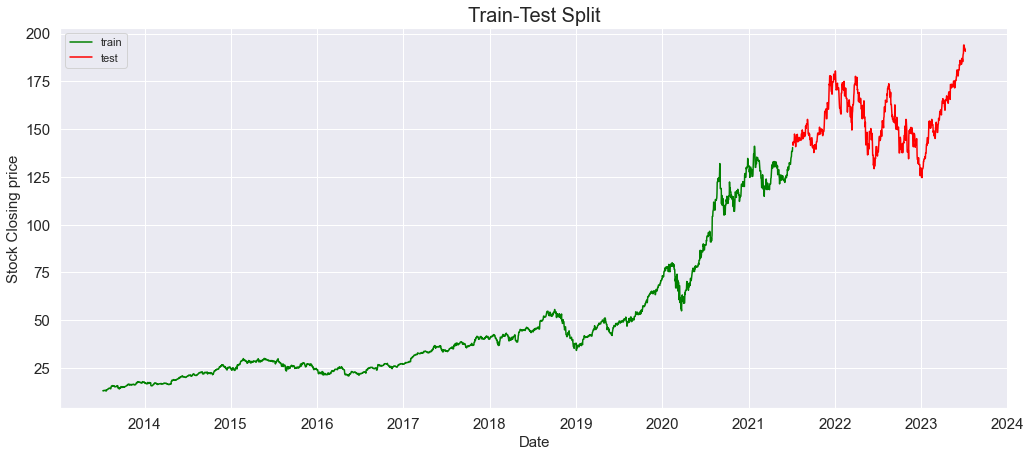

In [287]:
# Visualizing df_close dataset train_test split
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df_train_actual, label='train', color='green')
ax.plot(df_test_actual, label='test', color='red')
ax.set_title('Train-Test Split', fontsize=20)  
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Closing price', fontsize=15)
plt.legend()
ax.tick_params(axis='both', labelsize=15)
plt.show()


# Model

In [288]:
log_minus_roll_mean

,Adj Close
Date,
2013-07-15,0.004955
2013-07-16,0.008761
2013-07-17,0.005800
2013-07-18,0.007677
2013-07-19,-0.007697
...,...
2023-07-03,0.004504
2023-07-04,0.001200
2023-07-05,-0.006250


In [289]:
size = int(len(log_minus_roll_mean)*0.8)
size

2916

In [290]:
df_train = log_minus_roll_mean.iloc[:size]
df_train

,Adj Close
Date,
2013-07-15,0.004955
2013-07-16,0.008761
2013-07-17,0.005800
2013-07-18,0.007677
2013-07-19,-0.007697
...,...
2021-07-04,0.015009
2021-07-05,0.009622
2021-07-06,0.018392


In [291]:
df_test = log_minus_roll_mean.iloc[size:]
df_test

,Adj Close
Date,
2021-07-09,0.020947
2021-07-10,0.015785
2021-07-11,0.010623
2021-07-12,0.001850
2021-07-13,0.006112
...,...
2023-07-03,0.004504
2023-07-04,0.001200
2023-07-05,-0.006250


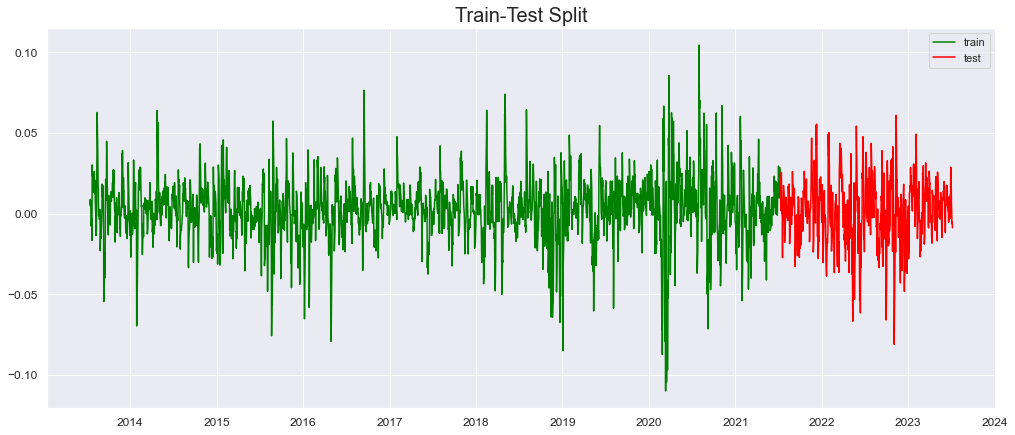

In [292]:
# Visualizing df_close dataset train_test split
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df_train, label='train', color='green')
ax.plot(df_test, label='test', color='red')
ax.set_title('Train-Test Split', fontsize=20)  
plt.legend()
ax.tick_params(axis='both', labelsize=12)
plt.show()

The Autocorrelation Function (ACF) plot is a graphical tool used to visualize the autocorrelation of a time series. Autocorrelation measures the correlation between a time series and its lagged versions (previous values at different time lags). 

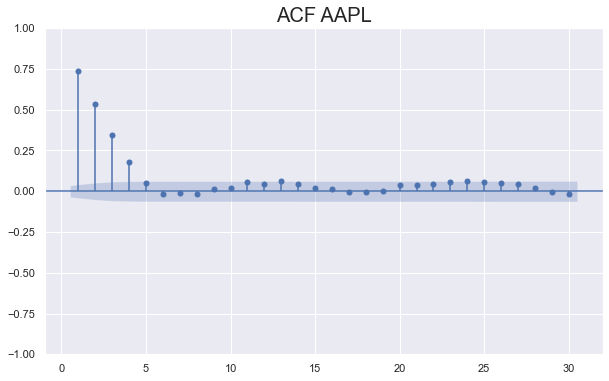

In [293]:
# Visualizing ACF
fig, ax = plt.subplots(figsize=(10, 6))
sgt.plot_acf(df_train, lags=30, zero=False, ax=ax)
plt.title('ACF AAPL', size=20)
plt.show()

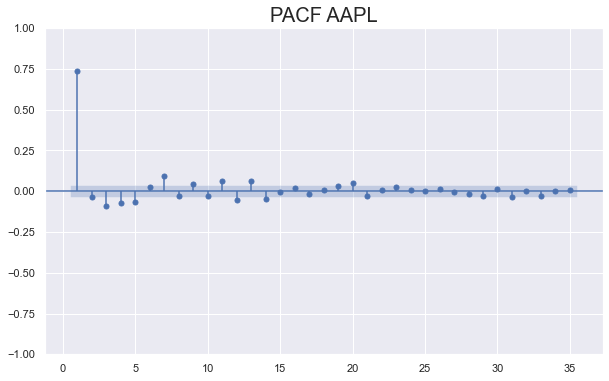

In [294]:
# Visualizing PACF
fig, ax = plt.subplots(figsize=(10, 6))
sgt.plot_pacf(df_train, zero=False, ax=ax)
plt.title('PACF AAPL', size = 20)
plt.show()

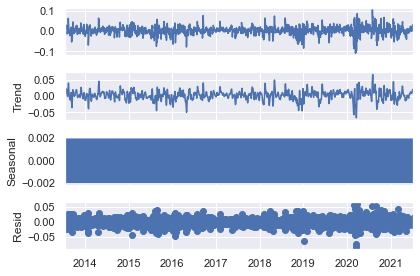

In [295]:
# seasonal_decompose() function is used to decompose the df_train time series data using the additive model.
Season_dec_additive = seasonal_decompose(df_train, model='additive')
Season_dec_additive.plot()
plt.show()

In [296]:
# Fit ARIMA model to a trainig dataset
ar = ARIMA(df_train, order=(1,0,0)).fit()

In [297]:
# use predict() function to generate predictions. Obtaining predicted values based on trained model
ar.predict()

Date
2013-07-15    0.002434
2013-07-16    0.004301
2013-07-17    0.007118
2013-07-18    0.004926
2013-07-19    0.006316
                ...   
2021-07-04    0.017050
2021-07-05    0.011743
2021-07-06    0.007755
2021-07-07    0.014247
2021-07-08    0.021702
Freq: D, Name: predicted_mean, Length: 2916, dtype: float64

In [298]:
# store predicted values on variable
y_pred_ar = ar.predict()

In [299]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2916
Model:                 ARIMA(1, 0, 0)   Log Likelihood                8564.007
Date:                Fri, 14 Jul 2023   AIC                         -17122.014
Time:                        14:56:48   BIC                         -17104.080
Sample:                    07-15-2013   HQIC                        -17115.554
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.581      0.010       0.001       0.004
ar.L1          0.7403      0.009     84.843      0.000       0.723       0.757
sigma2         0.0002   1.76e-06     93.321      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):             13874.65
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [300]:
ar.aic

-17122.01363671559

In [301]:
# Calculate root mean squared error RMSE between training data and predicted valued
ar_rmse = np.sqrt(mean_squared_error(df_train, y_pred_ar ))
ar_rmse

0.0128299465448692

In [302]:
# Fit ARIMA model to a trainig dataset
ma = ARIMA(df_train, order=(0,0,1)).fit()

In [303]:
# use predict() function to generate predictions. Obtaining predicted values based on trained model
ma.predict()

Date
2013-07-15    0.002429
2013-07-16    0.003538
2013-07-17    0.005271
2013-07-18    0.002734
2013-07-19    0.005338
                ...   
2021-07-04    0.006453
2021-07-05    0.007516
2021-07-06    0.003681
2021-07-07    0.011175
2021-07-08    0.012707
Freq: D, Name: predicted_mean, Length: 2916, dtype: float64

In [304]:
# store predicted values on variable
y_pred_ma = ma.predict()

In [305]:
ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2916
Model:                 ARIMA(0, 0, 1)   Log Likelihood                8147.745
Date:                Fri, 14 Jul 2023   AIC                         -16289.489
Time:                        14:56:53   BIC                         -16271.555
Sample:                    07-15-2013   HQIC                        -16283.029
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.000      5.486      0.000       0.002       0.003
ma.L1          0.5945      0.009     65.984      0.000       0.577       0.612
sigma2         0.0002    2.9e-06     75.508      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                 197.18   Jarque-Bera (JB):              5384.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [306]:
ma.aic

-16289.489247126025

In [307]:
# Calculate root mean squared error RMSE between training data and predicted valued
ma_rmse = np.sqrt(mean_squared_error(df_train, y_pred_ma ))
ma_rmse

0.014799517964858311

In [308]:
# Fit ARIMA model to a trainig dataset
arma = ARIMA(df_train, order=(1,0,1)).fit()

In [309]:
# use predict() function to generate predictions. Obtaining predicted values based on trained model
arma.predict()

Date
2013-07-15    0.002435
2013-07-16    0.004301
2013-07-17    0.007182
2013-07-18    0.004810
2013-07-19    0.006336
                ...   
2021-07-04    0.016680
2021-07-05    0.011449
2021-07-06    0.007552
2021-07-07    0.014392
2021-07-08    0.021795
Freq: D, Name: predicted_mean, Length: 2916, dtype: float64

In [310]:
# store predicted values on variable
y_pred_arma = arma.predict()

In [311]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2916
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8565.336
Date:                Fri, 14 Jul 2023   AIC                         -17122.671
Time:                        14:57:01   BIC                         -17098.760
Sample:                    07-15-2013   HQIC                        -17114.058
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.650      0.008       0.001       0.004
ar.L1          0.7222      0.014     51.096      0.000       0.695       0.750
ma.L1          0.0400      0.018      2.184      0.029       0.004       0.076
sigma2         0.0002   1.76e-06     93.319      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13979.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [312]:
arma.aic

-17122.67149338195

In [313]:
# Calculate root mean squared error RMSE between training data and predicted valued
arma_rmse = np.sqrt(mean_squared_error(df_train, y_pred_arma))
arma_rmse

0.012824096166677531

The auto_arima() function is a convenient way to automate the process of selecting the best ARIMA model by iterating over different combinations of model parameters. It uses a stepwise approach to explore various ARIMA configurations and chooses the model with the lowest information criterion (e.g., AIC, BIC) or another specified criterion.

In [314]:
auto_m = pm.auto_arima(df_train, 
                       start_p=1, start_q=1, max_p=4, max_q=4, d= 0, 
                       trace=True, stepwise=True, suppress_warnings=True,
                       error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17122.685, Time=2.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-14809.619, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17122.014, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-16289.489, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-14764.543, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-17118.036, Time=1.91 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-17136.845, Time=1.76 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-16832.064, Time=1.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-17099.054, Time=1.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-17146.306, Time=0.88 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-16995.228, Time=2.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-17165.414, Time=2.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-17156.433, Time=3.54 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-17178.909, Time=5.26 sec
 ARIM

In [318]:
# Fit ARIMA model to a trainig dataset
model_204 = ARIMA(df_train, order = (2,0,4)).fit()

In [319]:
# use predict() function to generate predictions. Obtaining predicted values based on trained model
model_204.predict()

Date
2013-07-15    0.002434
2013-07-16    0.004304
2013-07-17    0.007203
2013-07-18    0.004981
2013-07-19    0.006153
                ...   
2021-07-04    0.015923
2021-07-05    0.010556
2021-07-06    0.006763
2021-07-07    0.012344
2021-07-08    0.021385
Freq: D, Name: predicted_mean, Length: 2916, dtype: float64

In [320]:
# store predicted values on variable
y_pred_204 = model_204.predict()

In [321]:
# use predict() function to generate predictions on test set
y_pred_204_test = model_204.predict(start=df_test.index[0], end=df_test.index[-1])
y_pred_204_test

2021-07-09    0.010851
2021-07-10    0.008367
2021-07-11    0.005221
2021-07-12    0.002049
2021-07-13    0.001825
                ...   
2023-07-03    0.002434
2023-07-04    0.002434
2023-07-05    0.002434
2023-07-06    0.002434
2023-07-07    0.002434
Freq: D, Name: predicted_mean, Length: 729, dtype: float64

In [322]:
model_204.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2916
Model:                 ARIMA(2, 0, 4)   Log Likelihood                8596.733
Date:                Fri, 14 Jul 2023   AIC                         -17177.465
Time:                        14:57:55   BIC                         -17129.641
Sample:                    07-15-2013   HQIC                        -17160.238
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.935      0.003       0.001       0.004
ar.L1          0.5776      0.132      4.374      0.000       0.319       0.836
ar.L2         -0.1388      0.089     -1.558      0.119      -0.313       0.036
ma.L1          0.1786      0.131      1.362      0.173      -0.078       0.435
ma.L2          0.3081      0.034      9.064      0.000       0.241       0.375
ma.L3          0.2138      0.026      8.164      0.000       0.162       0.265
ma.L4          0.1421      0.021      6.876      0.000       0.102       0.183
sigma2         0.0002   1.78e-06     90.343      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             15211.74
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [323]:
# Calculate root mean squared error RMSE between training data and predicted valued
model_204_rmse = np.sqrt(mean_squared_error(df_train, y_pred_204))
model_204_rmse

0.012686593975064088

In [324]:
# Calculate root mean squared error RMSE between testing data and predicted valued
model_204_rmse_t = np.sqrt(mean_squared_error(df_test, y_pred_204_test))
model_204_rmse_t

0.020042352160216735

In [325]:
df_test

,Adj Close
Date,
2021-07-09,0.020947
2021-07-10,0.015785
2021-07-11,0.010623
2021-07-12,0.001850
2021-07-13,0.006112
...,...
2023-07-03,0.004504
2023-07-04,0.001200
2023-07-05,-0.006250


In [326]:
dict(zip(model_204.param_names, model_204.params))

{'const': 0.0024344377802009206,
 'ar.L1': 0.5776267090081987,
 'ar.L2': -0.13879755218628362,
 'ma.L1': 0.17855902365948412,
 'ma.L2': 0.3080810673252587,
 'ma.L3': 0.21375441922530486,
 'ma.L4': 0.14208152574778868,
 'sigma2': 0.00016085085176964625}

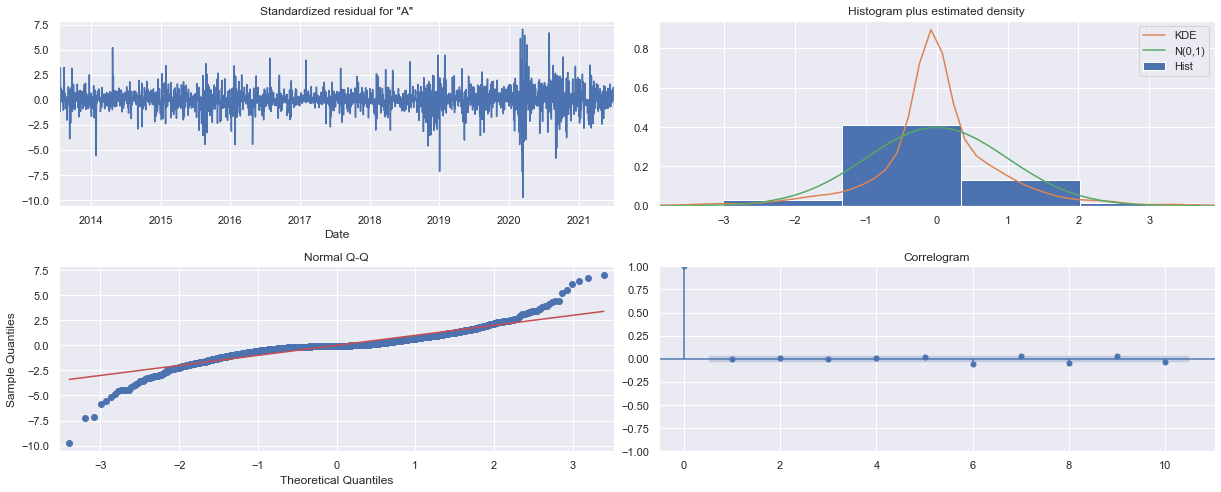

In [327]:
# Plot_diagnostics
model_204.plot_diagnostics(figsize = (17,7))
plt.tight_layout()
plt.show()

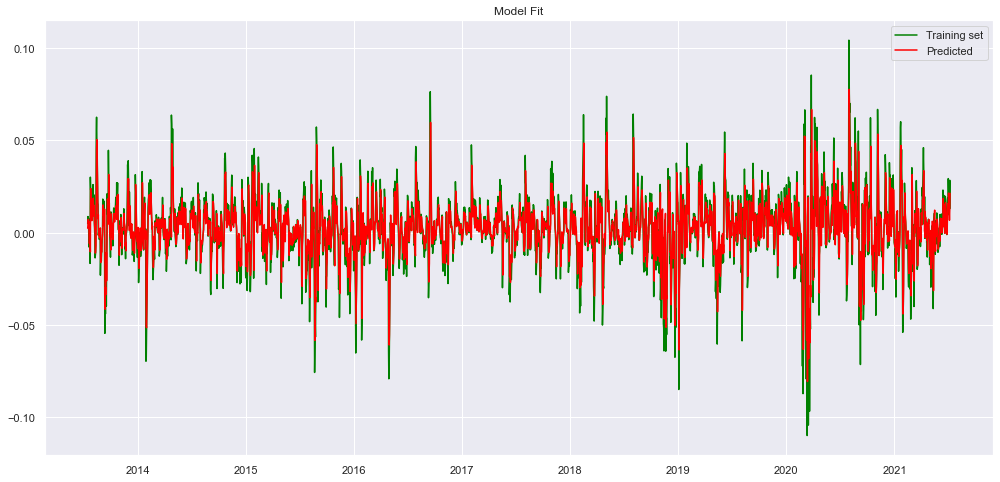

In [328]:
# Plot the predicted values from the ARIMA model vs train set
fig, ax = plt.subplots(figsize=(17, 8))
ax.plot(df_train, label='Training set', color = 'green')
ax.plot(y_pred_204, label='Predicted', color = 'red')
ax.legend()
ax.set_title('Model Fit')
plt.show()

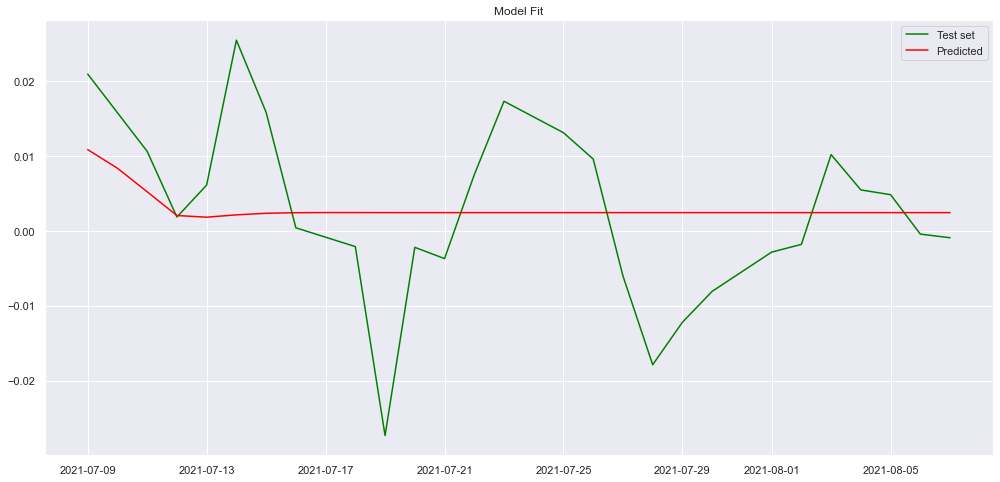

In [329]:
# Plot the predicted values from the ARIMA model vs test set
fig, ax = plt.subplots(figsize=(17, 8))
ax.plot(df_test[:30], label='Test set', color = 'green')
ax.plot(y_pred_204_test[:30], label='Predicted', color = 'red')
ax.legend()
ax.set_title('Model Fit')
plt.show()

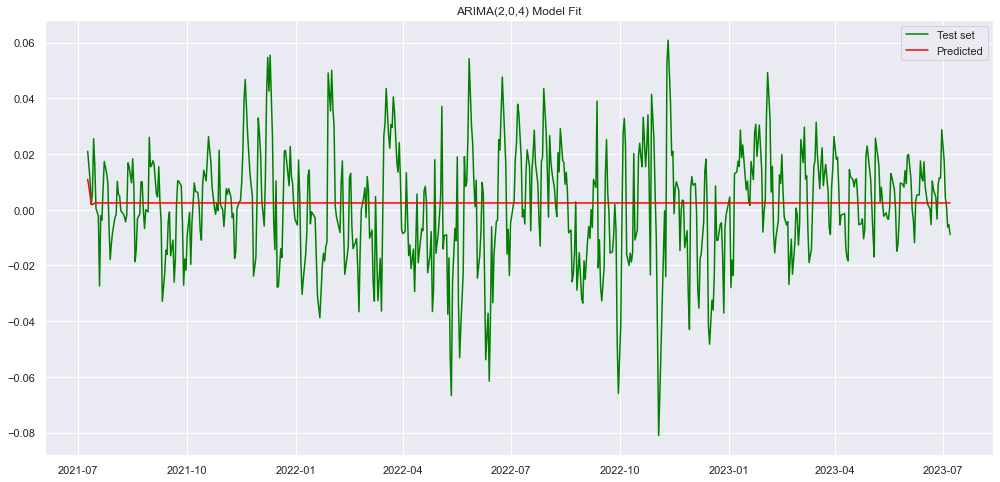

In [330]:
# Plot the predicted values from the ARIMA model vs test set
fig, ax = plt.subplots(figsize=(17, 8))
ax.plot(df_test, label='Test set', color = 'green')
ax.plot(y_pred_204_test, label='Predicted', color = 'red')
ax.legend()
ax.set_title('ARIMA(2,0,4) Model Fit')
plt.show()


In [331]:
forecast = model_204.get_forecast(30)
predmean = forecast.predicted_mean
pred_conf = forecast.conf_int()

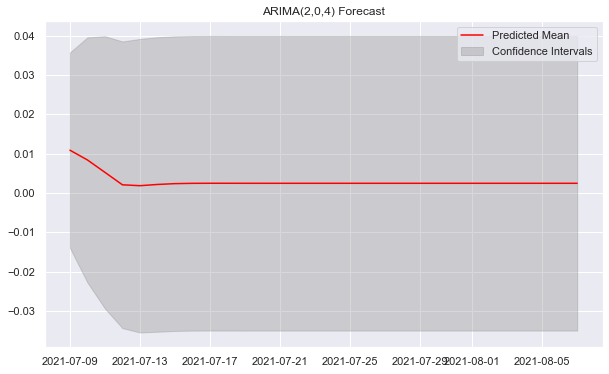

In [332]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the predicted mean
ax.plot(predmean, color='red', label='Predicted Mean')
# Plot the confidence intervals
ax.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Intervals')
ax.legend()
ax.set_title('ARIMA(2,0,4) Forecast')
plt.show()